<a href="https://colab.research.google.com/github/FIONA-Youkyung/Machin_Learining_Class/blob/master/mnist_cnn_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.1.0-rc1
/device:GPU:0


In [0]:
from tensorflow.keras.datasets import mnist
import os 
import matplotlib.pyplot as plt 
import numpy 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint 

In [23]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# 4차원 데이터로 X_train과 X_test 변경 
X_train = X_train.reshape(*X_train.shape,1)
X_test = X_test.reshape(*X_test.shape,1)
#Y_train 과 Y_test를 One-hot-encoding으로 변환 
Y_train = to_categorical(Y_train,num_classes=10,dtype='float16')
Y_test = to_categorical(Y_test,num_classes=10,dtype='float16')

# X_train과 X_test 정규화 
X_train = X_train.astype('float16') / 255
X_test = X_test.astype('float16') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
model = Sequential()

In [0]:
# Conv2D -> Conv2D -> Maxpool2D -> Dropout -> Flateen -> Dense -> Dropout -> Dense
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', input_shape =(28,28,1)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu', input_shape =(28,28,1)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [0]:
model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [17]:
# 신경망 모델의 성능 향상이 없는 경우 중간에  epoch를 빨리 중지 시키기 위해서 

early_stop = EarlyStopping(monitor='val_loss',
                           verbose = 1,
                           patience = 10
                           )

# 신경망 학습 
history = model.fit(X_train,Y_train,batch_size = 200, epochs=50,verbose =1,callbacks=[early_stop],validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2708 - accuracy: 0.9174 - val_loss: 0.0535 - val_accuracy: 0.9823
Epoch 2/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.0391 - val_accuracy: 0.9858
Epoch 3/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0625 - accuracy: 0.9812 - val_loss: 0.0357 - val_accuracy: 0.9876
Epoch 4/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 5/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0287 - val_accuracy: 0.9906
Epoch 6/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0311 - val_accuracy: 0.9890
Epoch 7/50
60000/60000 [==============================

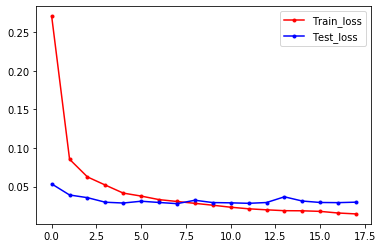

In [18]:
#손실 그래프
train_loss = history.history['loss']
test_loss = history.history['val_loss']

x= range(len(train_loss))
plt.plot(x,train_loss,marker ='.',color ='red',label = 'Train_loss')
plt.plot(x,test_loss,marker ='.',color ='blue',label = 'Test_loss')
plt.legend() 
plt.show()

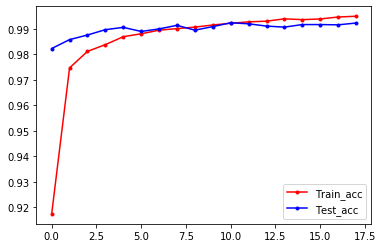

In [19]:
# 정확도 그래프 
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

x= range(len(train_acc))
plt.plot(x,train_acc,marker ='.',color ='red',label = 'Train_acc')
plt.plot(x,test_acc,marker ='.',color ='blue',label = 'Test_acc')
plt.legend() 
plt.show()